# Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv('airfoil.csv',header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299


In [4]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,5]



In [5]:
x.head()

,0,1,2,3,4
0,8000.0,4.0,0.2286,39.6,0.004738
1,6300.0,0.0,0.0508,55.5,0.000762
2,400.0,4.0,0.2286,55.5,0.004286
3,1250.0,15.4,0.0508,39.6,0.028259
4,800.0,7.3,0.2286,39.6,0.012348


In [6]:
y.head()

0    113.129
1    132.796
2    123.274
3    126.743
4    126.299
Name: 5, dtype: float64

# The weights have been defined on the basis of experiment on the data over numerous values

In [7]:
weights=[1,1,1,1,1,1]
weights=np.asarray(weights)
weights=weights.reshape(len(weights),1)
weights.shape

(6, 1)

In [8]:
weight1=[0,0,0,0,0,0]
weight1=np.asarray(weight1)
weight1=weight1.reshape(len(weight1),1)
weights.shape

(6, 1)

In [9]:
weight2=[1,1,1,1,1,1]
weight2=np.asarray(weight2)
weight2=weight2.reshape(len(weight2),1)
weight2.shape

(6, 1)

In [10]:
weight3=[2,2,2,2,2,2]
weight3=np.asarray(weight3)
weight3=weight3.reshape(len(weight3),1)
weights.shape

(6, 1)

In [11]:
scaler=MinMaxScaler()

In [12]:
x=scaler.fit_transform(x)

In [13]:
x

array([[0.39393939, 0.18018018, 0.72727273, 0.19949495, 0.07476783],
       [0.30808081, 0.        , 0.09090909, 0.6010101 , 0.00622727],
       [0.01010101, 0.18018018, 0.72727273, 0.6010101 , 0.06697943],
       ...,
       [0.03030303, 0.09009009, 0.72727273, 0.6010101 , 0.04713909],
       [0.1489899 , 0.14864865, 0.27272727, 1.        , 0.02805586],
       [0.02171717, 0.18018018, 1.        , 0.19949495, 0.0930119 ]])

In [14]:
x=pd.DataFrame(x)


In [15]:
print(x.shape)
x.head()

(1202, 5)


,0,1,2,3,4
0,0.393939,0.180180,0.727273,0.199495,0.074768
1,0.308081,0.000000,0.090909,0.601010,0.006227
2,0.010101,0.180180,0.727273,0.601010,0.066979
3,0.053030,0.693694,0.090909,0.199495,0.480233
4,0.030303,0.328829,0.727273,0.199495,0.205952


# We split the data in train and test phase

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [18]:
type(X_train)
Bias_array=[1]*(len(X_train))
X_train.insert(loc=0,column='bias',value=Bias_array)
type(X_train)

pandas.core.frame.DataFrame

In [19]:
Bias_array1=[1]*(len(X_test))
X_test.insert(loc=0,column='bias',value=Bias_array1)

In [20]:
y_test=pd.DataFrame(y_test)
type(y_test)

pandas.core.frame.DataFrame

In [21]:
y_train=pd.DataFrame(y_train)
type(y_train)

pandas.core.frame.DataFrame

In [22]:
y_train=y_train.to_numpy()

In [23]:
y_test=y_test.to_numpy()

In [24]:
y_train=y_train.reshape(len(y_train),1)

In [25]:
y_test=y_test.reshape(len(y_test),1)

In [26]:
# y_train
y_test.shape

(361, 1)

# The algorithm for update of the weights,gradient desecnt

In [27]:
learning_parameter=0.1
iters=1000
for i in range(0,iters):
    error=X_train.dot(weights)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weights=weights-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
predict=X_test.dot(weights)   
# weights.shape  
# y_train.shape
# predict

# R2 Score prediction

In [28]:
from sklearn.metrics import r2_score
print("R2 Score = ",r2_score(y_test,predict))

R2 Score =  0.3972846877457765


# How number of iterations  affects the mean squared error for 3 different initial regression coefficients (weights) for fixed value of learning parameter

In [736]:
learning_parameter=0.1
iters_loop=[1000,5000,10000,20000]
w1=[]
for i in iters_loop:
    
    
    error=X_train.dot(weight1)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weight1=weight1-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict1=X_test.dot(weight1) 
    w1.append(r2_score(y_test,predict1))
print(w1)

[0.3806727037952946, 0.3808344401531737, 0.3809955276721818, 0.38115596932890317]


In [704]:
learning_parameter=0.1
iters_loop=[1000,5000,10000,20000]
w2=[]
for i in iters_loop:
    error=X_train.dot(weight2)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weight2=weight2-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict=X_test.dot(weight2)
    w2.append(r2_score(y_test,predict))
    
print(w2)

[0.39179403820386016, 0.39191228063517125, 0.39203006917029115, 0.3921474057911989]


In [752]:
learning_parameter=0.1
iters_loop=[1000,5000,10000,20000]
w3=[]
for i in iters_loop:
    error=X_train.dot(weight3)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weight3=weight3-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict3=X_test.dot(weight3)   
    w3.append(r2_score(y_test,predict3))
print(w3)    

[0.36621624878972237, 0.3664375745110491, 0.3666579741090359, 0.3668774520375888]


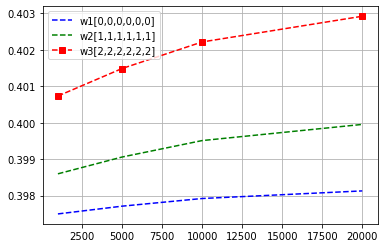

In [763]:
converge_iter=[1000,5000,10000,20000]
plt.plot(converge_iter,w1,'b--',label='w1[0,0,0,0,0,0]')
plt.plot(converge_iter,w2,'g--',label='w2[1,1,1,1,1,1]')
plt.plot(converge_iter,w3,'rs--',label='w3[2,2,2,2,2,2]')
plt.grid()
plt.legend()
plt.show()


# How number of iterations  affects the mean squared error for 3 different  values learning parameter  and fixed initial regression coefficients (weights) .

In [754]:
learning_parameter=0.22
iters_loop=[1000,5000,10000,20000]
w1=[]
for i in iters_loop:
    error=X_train.dot(weights)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weights=weights-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict1=X_test.dot(weights)
    w1.append(r2_score(y_test,predict1))
print(w1)


[0.39749870382554364, 0.3977109639699131, 0.39792148465797683, 0.39813028220029245]


In [756]:
learning_parameter=0.5
iters_loop=[1000,5000,10000,20000]
w2=[]
for i in iters_loop:
    error=X_train.dot(weights)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weights=weights-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict2=X_test.dot(weights)
    w2.append(r2_score(y_test,predict2))
print(w2)


[0.3985992054564622, 0.39905946057636466, 0.3995112310784199, 0.399954696259466]


In [757]:
learning_parameter=0.9
iters_loop=[1000,5000,10000,20000]
w3=[]
for i in iters_loop:
    error=X_train.dot(weights)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weights=weights-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
    predict3=X_test.dot(weights)
    w3.append(r2_score(y_test,predict3))
print(w3)


[0.4007341631296317, 0.4014881240612821, 0.4022175384610457, 0.40292332671412656]


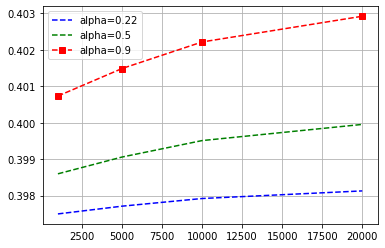

In [761]:
converge_iter=[1000,5000,10000,20000]
plt.plot(converge_iter,w1,'b--',label='alpha=0.22')
plt.plot(converge_iter,w2,'g--',label='alpha=0.5')
plt.plot(converge_iter,w3,'rs--',label='alpha=0.9')
plt.grid()
plt.legend()
plt.show()


# Questions to be experimented:-

# Q)If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. (No need of Code Experimentation)


(a) When 0-0.5% of values are missing of that feature

=> This could be handled by removing the rows which are missing(of corresponding feature).


(b) When 8-10% of values are missing of that feature

=> Fill in the missing with either mean/median(approximation)


(c) When 60-70% of values are missing of that feature

=> If nearly such a large portion of data is missing then we can DROP that feature altogether which would be a smart trick rather than using any approximation.